In [135]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, col, count, sum
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [137]:
spark = SparkSession.builder.appName("Road Accident Analysis").getOrCreate()

In [139]:
df = spark.read.csv("smart_traffic_data.csv", header=True, inferSchema=True)
print("Total Records:", df.count())
df.printSchema()

Total Records: 1000
root
 |-- Location: string (nullable = true)
 |-- TimeSlot: string (nullable = true)
 |-- VehicleType: string (nullable = true)
 |-- VehicleCount: integer (nullable = true)
 |-- AvgSpeed(kmph): integer (nullable = true)
 |-- Weather: string (nullable = true)
 |-- AccidentsReported: integer (nullable = true)



In [140]:
# Average Speed by Location and TimeSlot
avg_speed = df.groupBy("Location", "TimeSlot").agg(avg("`AvgSpeed(kmph)`").alias("AverageSpeed"))
print("\nAverage Speed by Location & Time Slot:")
avg_speed.show()



Average Speed by Location & Time Slot:
+---------------+------------+------------------+
|       Location|    TimeSlot|      AverageSpeed|
+---------------+------------+------------------+
|      Tech Park|   Afternoon|             46.75|
|        Mall Rd|Morning Peak|53.714285714285715|
|        Mall Rd|   Afternoon| 50.31481481481482|
|Industrial Area|Morning Peak|             47.78|
|     Airport Rd|       Night| 50.91428571428571|
|       Downtown|   Afternoon| 50.78431372549019|
|Industrial Area|       Night| 47.86538461538461|
|      Tech Park|Morning Peak|52.674418604651166|
|     Airport Rd|   Afternoon|45.509803921568626|
|     Airport Rd|Evening Peak|49.294117647058826|
|        Mall Rd|       Night| 52.97727272727273|
|      Tech Park|       Night| 50.46296296296296|
|       Downtown|Morning Peak|              47.5|
|       Downtown|Evening Peak|              50.0|
|Industrial Area|   Afternoon|51.529411764705884|
|Industrial Area|Evening Peak| 51.05882352941177|
|        M

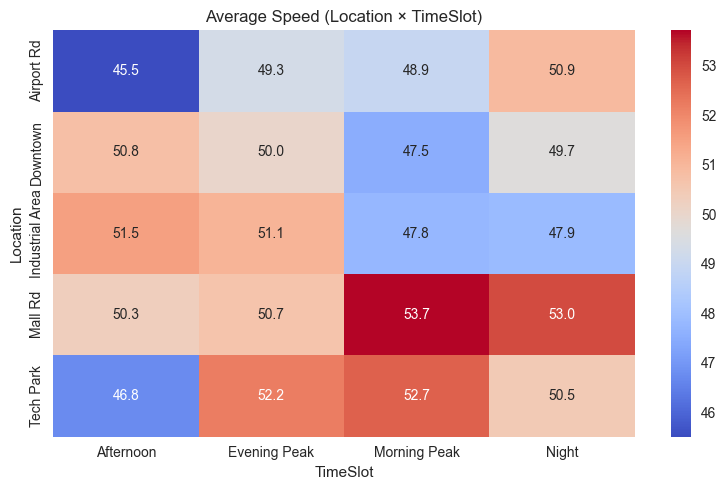

In [157]:
pdf = df.toPandas()
plt.style.use("seaborn-v0_8")
heat_pd = avg_speed.toPandas().pivot(index="Location", columns="TimeSlot", values="AverageSpeed")
plt.figure(figsize=(8,5))
sns.heatmap(heat_pd, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Average Speed (Location × TimeSlot)")
plt.tight_layout()
plt.show()

In [145]:
# Total Vehicle Count by Location
total_vehicles = df.groupBy("Location").agg(sum("VehicleCount").alias("TotalVehicles"))
print("\nTotal Vehicles per Location:")
total_vehicles.show()


Total Vehicles per Location:
+---------------+-------------+
|       Location|TotalVehicles|
+---------------+-------------+
|Industrial Area|        21729|
|     Airport Rd|        20973|
|      Tech Park|        20862|
|        Mall Rd|        22697|
|       Downtown|        21767|
+---------------+-------------+



In [146]:
# Accident Hotspots
accident_hotspots = df.groupBy("Location").agg(sum("AccidentsReported").alias("TotalAccidents"))
print("\nAccident Hotspots:")
accident_hotspots.orderBy(col("TotalAccidents").desc()).show()


Accident Hotspots:
+---------------+--------------+
|       Location|TotalAccidents|
+---------------+--------------+
|Industrial Area|           218|
|       Downtown|           210|
|     Airport Rd|           207|
|      Tech Park|           196|
|        Mall Rd|           193|
+---------------+--------------+



C:\Users\KRANTHI\AppData\Local\Temp\ipykernel_12764\1651745253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accident_pd.sort_values("TotalAccidents", ascending=False),


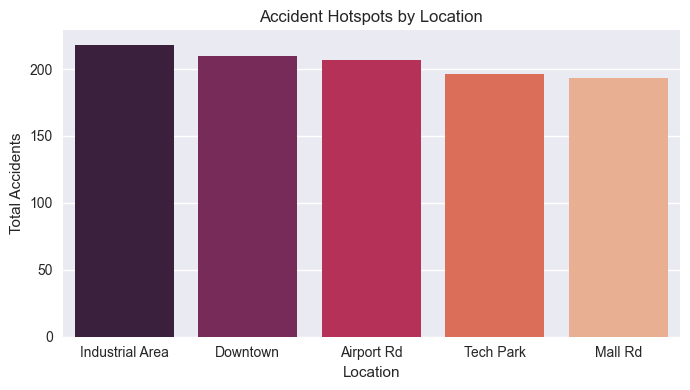

In [148]:
accident_pd = accident_hotspots.toPandas()
plt.figure(figsize=(7,4))
sns.barplot(data=accident_pd.sort_values("TotalAccidents", ascending=False),
            x="Location", y="TotalAccidents", palette="rocket")
plt.title("Accident Hotspots by Location")
plt.xlabel("Location")
plt.ylabel("Total Accidents")
plt.tight_layout()
plt.show()

In [150]:
# Vehicle Distribution
vehicle_dist = df.groupBy("VehicleType").agg(sum("VehicleCount").alias("TotalCount"))
print("\nVehicle Type Distribution:")
vehicle_dist.show()


Vehicle Type Distribution:
+-----------+----------+
|VehicleType|TotalCount|
+-----------+----------+
|       Bike|     26153|
|        Car|     27337|
|      Truck|     25006|
|        Bus|     29532|
+-----------+----------+



C:\Users\KRANTHI\AppData\Local\Temp\ipykernel_12764\2676846909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vehicle_pd, x="VehicleType", y="TotalCount", palette="viridis")


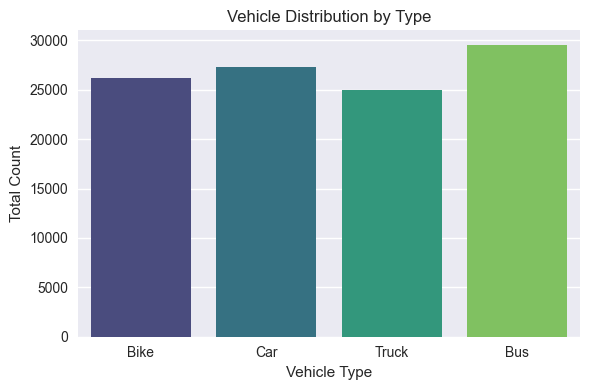

In [151]:
vehicle_pd = vehicle_dist.toPandas()
plt.figure(figsize=(6,4))
sns.barplot(data=vehicle_pd, x="VehicleType", y="TotalCount", palette="viridis")
plt.title("Vehicle Distribution by Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Count")
plt.tight_layout()
plt.show()


Correlation between Vehicle Count and Accidents: -0.05


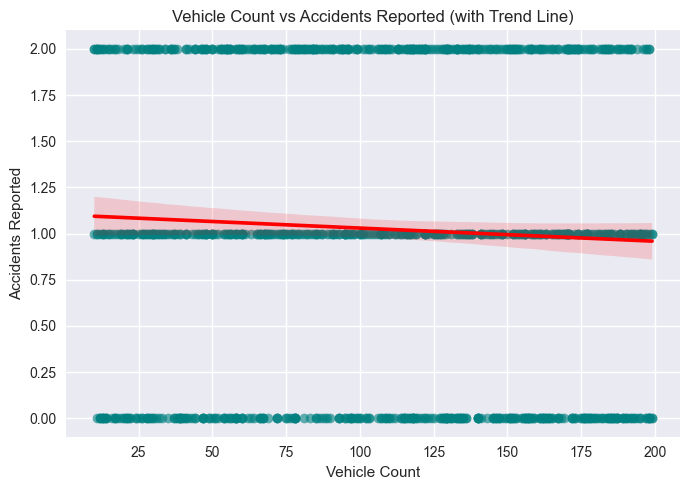

In [152]:
# Regression Plot — Relationship between Vehicle Count and Accidents
corr = pdf[["VehicleCount", "AccidentsReported"]].corr().iloc[0,1]
print(f"\nCorrelation between Vehicle Count and Accidents: {corr:.2f}")

plt.figure(figsize=(7,5))
sns.regplot(
    data=pdf,
    x="VehicleCount",
    y="AccidentsReported",
    scatter_kws={"alpha":0.6},
    line_kws={"color":"red"},
    color="teal"
)
plt.title("Vehicle Count vs Accidents Reported (with Trend Line)")
plt.xlabel("Vehicle Count")
plt.ylabel("Accidents Reported")
plt.tight_layout()
plt.show()
